Data Preprocessing

In [34]:
pip install numpy

In [35]:
pip install matplotlib

In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset = pd.read_csv('properties_data.csv')
print(dataset.head())

        id          neighborhood   latitude  longitude    price  size_in_sqft  \
0  5528049         Palm Jumeirah  25.113208  55.138932  2700000          1079   
1  6008529         Palm Jumeirah  25.106809  55.151201  2850000          1582   
2  6034542  Jumeirah Lake Towers  25.063302  55.137728  1150000          1951   
3  6326063       Culture Village  25.227295  55.341761  2850000          2020   
4  6356778         Palm Jumeirah  25.114275  55.139764  1729200           507   

   price_per_sqft  no_of_bedrooms  no_of_bathrooms quality  ...  private_pool  \
0         2502.32               1                2  Medium  ...         False   
1         1801.52               2                2  Medium  ...         False   
2          589.44               3                5  Medium  ...         False   
3         1410.89               2                3     Low  ...         False   
4         3410.65               0                1  Medium  ...         False   

   security  shared_gym  s

#Checking Null Values

In [ ]:
dataset.isna().sum()

id                     0
neighborhood           0
latitude               0
longitude              0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64

In [ ]:
result = dataset.dtypes
print(result)

id                       int64
neighborhood            object
latitude               float64
longitude              float64
price                    int64
size_in_sqft             int64
price_per_sqft         float64
no_of_bedrooms           int64
no_of_bathrooms          int64
quality                 object
maid_room                 bool
unfurnished               bool
balcony                   bool
barbecue_area             bool
built_in_wardrobes        bool
central_ac                bool
childrens_play_area       bool
childrens_pool            bool
concierge                 bool
covered_parking           bool
kitchen_appliances        bool
lobby_in_building         bool
maid_service              bool
networked                 bool
pets_allowed              bool
private_garden            bool
private_gym               bool
private_jacuzzi           bool
private_pool              bool
security                  bool
shared_gym                bool
shared_pool               bool
shared_s

In [ ]:
dataset = dataset.astype({'neighborhood': 'category', 'quality': 'category'})
print(dataset.head())

        id          neighborhood   latitude  longitude    price  size_in_sqft  \
0  5528049         Palm Jumeirah  25.113208  55.138932  2700000          1079   
1  6008529         Palm Jumeirah  25.106809  55.151201  2850000          1582   
2  6034542  Jumeirah Lake Towers  25.063302  55.137728  1150000          1951   
3  6326063       Culture Village  25.227295  55.341761  2850000          2020   
4  6356778         Palm Jumeirah  25.114275  55.139764  1729200           507   

   price_per_sqft  no_of_bedrooms  no_of_bathrooms quality  ...  private_pool  \
0         2502.32               1                2  Medium  ...         False   
1         1801.52               2                2  Medium  ...         False   
2          589.44               3                5  Medium  ...         False   
3         1410.89               2                3     Low  ...         False   
4         3410.65               0                1  Medium  ...         False   

   security  shared_gym  s

In [ ]:
result = dataset.dtypes
print(result)

id                        int64
neighborhood           category
latitude                float64
longitude               float64
price                     int64
size_in_sqft              int64
price_per_sqft          float64
no_of_bedrooms            int64
no_of_bathrooms           int64
quality                category
maid_room                  bool
unfurnished                bool
balcony                    bool
barbecue_area              bool
built_in_wardrobes         bool
central_ac                 bool
childrens_play_area        bool
childrens_pool             bool
concierge                  bool
covered_parking            bool
kitchen_appliances         bool
lobby_in_building          bool
maid_service               bool
networked                  bool
pets_allowed               bool
private_garden             bool
private_gym                bool
private_jacuzzi            bool
private_pool               bool
security                   bool
shared_gym                 bool
shared_p

In [ ]:
categories = dataset['neighborhood'].cat.categories
print(categories)

Index(['Al Barari', 'Al Barsha', 'Al Furjan', 'Al Kifaf', 'Al Quoz',
       'Al Sufouh', 'Arjan', 'Barsha Heights (Tecom)', 'Bluewaters',
       'Business Bay', 'City Walk', 'Culture Village', 'DAMAC Hills', 'DIFC',
       'Discovery Gardens', 'Downtown Dubai',
       'Dubai Creek Harbour (The Lagoons)', 'Dubai Festival City',
       'Dubai Harbour', 'Dubai Healthcare City', 'Dubai Hills Estate',
       'Dubai Land', 'Dubai Marina', 'Dubai Production City (IMPZ)',
       'Dubai Residence Complex', 'Dubai Silicon Oasis',
       'Dubai South (Dubai World Central)', 'Dubai Sports City',
       'Falcon City of Wonders', 'Green Community', 'Greens',
       'International City', 'Jebel Ali', 'Jumeirah',
       'Jumeirah Beach Residence', 'Jumeirah Golf Estates',
       'Jumeirah Lake Towers', 'Jumeirah Village Circle',
       'Jumeirah Village Triangle', 'Meydan', 'Mina Rashid', 'Mirdif',
       'Mohammed Bin Rashid City', 'Motor City', 'Mudon', 'Old Town',
       'Palm Jumeirah', 'Remraam',

In [ ]:
categories = dataset['quality'].cat.categories
print(categories)

Index(['High', 'Low', 'Medium', 'Ultra'], dtype='object')


In [ ]:
dataset['neighborhood'].value_counts()

neighborhood
Downtown Dubai                       302
Dubai Marina                         288
Jumeirah Village Circle              200
Palm Jumeirah                        178
Jumeirah Beach Residence             116
Business Bay                          97
Jumeirah Lake Towers                  70
Dubai Hills Estate                    53
The Views                             47
Jumeirah                              39
Dubai Creek Harbour (The Lagoons)     38
Mohammed Bin Rashid City              31
DIFC                                  31
Dubai Harbour                         30
Greens                                30
Motor City                            27
Town Square                           27
Dubai Sports City                     25
Al Furjan                             23
DAMAC Hills                           21
Meydan                                17
Old Town                              17
City Walk                             14
Umm Suqeim                            13
Dub

since the column neigborhood has more than ten categories and some of them contains less records, so we gonna drop that column.,
and the latitude and longitude related with the location and since we are dropping the neighbourhood we gonna drop those columns too,
to avoid the model complexity.

In [ ]:
dataset['neighborhood'] = pd.factorize(dataset['neighborhood'])[0]

# Calculate the correlation between 'neighborhood' and 'latitude'
corr = dataset['neighborhood'].corr(dataset['latitude'])

# Print the correlation
print(corr)

-0.3038517558856541


In [ ]:
dataset['neighborhood'] = pd.factorize(dataset['neighborhood'])[0]

# Calculate the correlation between 'neighborhood' and 'latitude'
corr = dataset['neighborhood'].corr(dataset['longitude'])

# Print the correlation
print(corr)

0.2525599508250072


In [ ]:
corr = dataset['price'].corr(dataset['longitude'])
# Print the correlation
print(corr)

-0.015394661010596741


Problem: “Price” is the response variable and therefore “price per square feet” cannot be considered as a predictor variable.
Proposed solution: Remove the variable and carry out the analysis.

and id also doesnt have any predictive power

so we will be dropping, (neighborhood,longitude,latitude,price per sqaure feet),id

In [ ]:
dataset2 = dataset.drop(['neighborhood', 'longitude', 'latitude','price_per_sqft','id'], axis=1)

In [ ]:
dataset2.head()

,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,2700000,1079,1,2,Medium,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
1,2850000,1582,2,2,Medium,False,False,True,False,True,...,False,False,True,True,False,False,False,False,True,False
2,1150000,1951,3,5,Medium,True,True,True,False,True,...,False,True,True,True,False,False,False,True,True,True
3,2850000,2020,2,3,Low,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1729200,507,0,1,Medium,False,False,False,False,True,...,False,True,True,True,True,False,False,True,True,False


label encoding

encoding the quality column

0,1,2,3


In [ ]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder() 
dataset2['quality'] = label_encoder.fit_transform(dataset2['quality']) 

In [ ]:
dataset2.head()

,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,2700000,1079,1,2,2,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
1,2850000,1582,2,2,2,False,False,True,False,True,...,False,False,True,True,False,False,False,False,True,False
2,1150000,1951,3,5,2,True,True,True,False,True,...,False,True,True,True,False,False,False,True,True,True
3,2850000,2020,2,3,1,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1729200,507,0,1,2,False,False,False,False,True,...,False,True,True,True,True,False,False,True,True,False


In [ ]:
le = LabelEncoder()
dataset_encoded = dataset2.iloc[:,5:33]

for i in dataset_encoded:
    dataset2[i] = le.fit_transform(dataset_encoded[i])

dataset2.head()

,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,2700000,1079,1,2,2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,2850000,1582,2,2,2,0,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
2,1150000,1951,3,5,2,1,1,1,0,1,...,0,1,1,1,0,0,0,1,1,1
3,2850000,2020,2,3,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1729200,507,0,1,2,0,0,0,0,1,...,0,1,1,1,1,0,0,1,1,0


normalizing the price column and size_in_sqft

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#dataset2['price']= sc.fit_transform(dataset2['price'].values.reshape(-1,1))

In [ ]:
#dataset2.head()

,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,0.210879,1079,1,2,2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0.262382,1582,2,2,2,0,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
2,-0.321322,1951,3,5,2,1,1,1,0,1,...,0,1,1,1,0,0,0,1,1,1
3,0.262382,2020,2,3,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.122451,507,0,1,2,0,0,0,0,1,...,0,1,1,1,1,0,0,1,1,0


In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#dataset2['size_in_sqft']= sc.fit_transform(dataset2['size_in_sqft'].values.reshape(-1,1))

In [ ]:
#dataset2.head()

,price,size_in_sqft,no_of_bedrooms,no_of_bathrooms,quality,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,0.210879,-0.379298,1,2,2,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0.262382,0.185076,2,2,2,0,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0
2,-0.321322,0.599100,3,5,2,1,1,1,0,1,...,0,1,1,1,0,0,0,1,1,1
3,0.262382,0.676519,2,3,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.122451,-1.021090,0,1,2,0,0,0,0,1,...,0,1,1,1,1,0,0,1,1,0


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

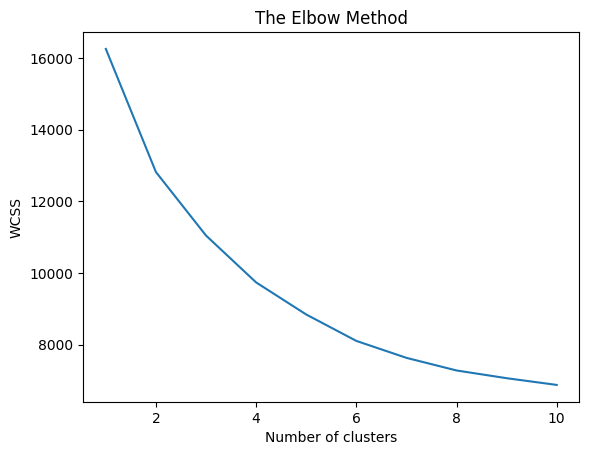

In [ ]:
#from sklearn.cluster import KMeans
#wcss = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#    kmeans.fit(dataset2)
#    wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), wcss)
#plt.title('The Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('WCSS')
#plt.show()

In [ ]:
#from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
#y_kmeans = kmeans.fit_predict(dataset2)


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
#Create a scatter plot for each cluster
#plt.scatter(dataset2[y_kmeans == 0, 0], dataset2[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
#plt.scatter(dataset2[y_kmeans == 1, 0], dataset2[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
#plt.scatter(dataset2[y_kmeans == 2, 0], dataset2[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
#plt.scatter(dataset2[y_kmeans == 3, 0], dataset2[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
#plt.title('Clusters of Propeties based on the Quality')
#plt.xlabel('Annual Income (k$)')
#plt.ylabel('Spending Score (1-100)')
#plt.legend()
#plt.show()